# Unsupervised Learning with K-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

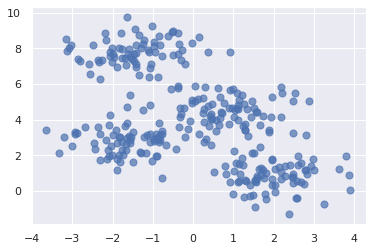

In [2]:
# Generating a semirandom assortment of x and y coordinate pairs.

from sklearn.datasets import make_blobs

points, cluster_indexes = make_blobs(n_samples=300,centers=4,cluster_std=0.8,random_state=0)

x = points[: , 0]
y = points[: , 1]

plt.scatter(x,y,s=50,alpha=0.7)

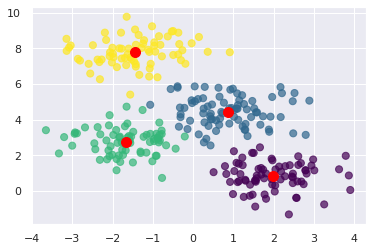

In [3]:
#Using K-means clustering to divide the coordinate pairs into four groups

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x,y,c=predicted_cluster_indexes,s=50,alpha=0.7,cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=100)

Text(0, 0.5, 'Inertia')

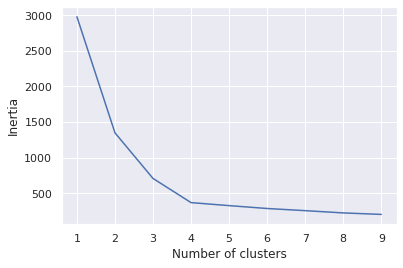

In [4]:
#Using plot ineratias to find the number of clusters

inertias = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

## Real Life example of K-means clustering  

In [5]:
# Using K-Means clustering to id customers to target with a promotion to increase their purchasing activity

import pandas as pd

In [6]:
customers = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv")

customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

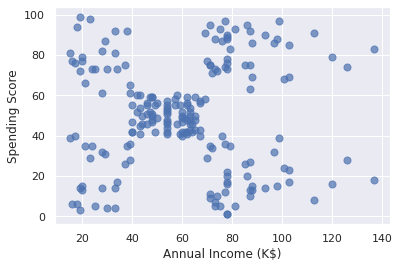

In [7]:
#Plotting the annual incomes and spending scores

points = customers.iloc[:, 3:].values

x = points[:,0]
y = points[:,1]

plt.scatter(x,y,s=50,alpha=0.7)
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")

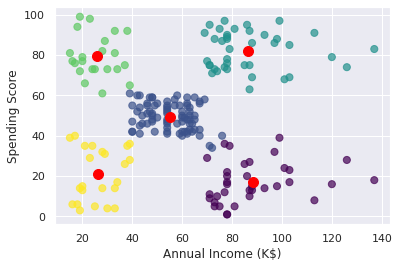

In [8]:
# From the image above you can see the plots fall into 5 groups

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y,c=predicted_cluster_indexes,s=50,alpha=0.7,cmap="viridis")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=100)

In [9]:
#Making a copy of the data and adding a col named Cluster containing cluster indexes

df = customers.copy()
df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [10]:
# code to ID customers who have high incomes but low spending scores

import numpy as np


In [11]:
#Obtaining the cluster index for a customer with a high income and low spending score

cluster = kmeans.predict(np.array([[120,20]]))[0]

In [12]:
#filter the dataframe to include only customers in that cluster

clustered_df = df[df["Cluster"] == cluster]

In [13]:
clustered_df["CustomerID"].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

## Segmenting Customers Using More Than Two Dimensions

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df = customers.copy()
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

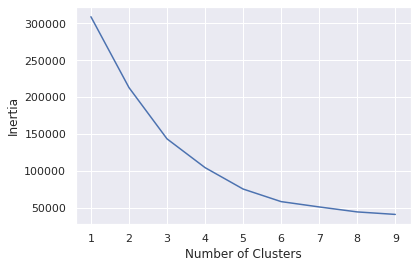

In [16]:
#Extracting gender, age, annual income and score cols. Then using the elbow method to determine the nnumber of clusters 

points = df.iloc[:,1:].values
inertias = []

for i in range(1,10):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10),inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [17]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)

df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [18]:
#Creating a new df with the avg of age, income, etc

results = pd.DataFrame(columns=["Cluster","Average Age","Average Income","Average Spending Index","Number of Females","Number of Males"])

In [19]:
for i,center in enumerate(kmeans.cluster_centers_):
  age = center[1]
  income = center[2]
  spend = center[3]
  gdf = df[df["Cluster"] == i]
  females = gdf[gdf["Gender"] == 0].shape[0]
  males = gdf[gdf["Gender"] == 1].shape[0]

  results.loc[i] = ([i,age,income,spend,females,males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0


# K-Nearest Neighbors

In [20]:
#Using k-nearest neighbor classifier to classify flowers using the iris dataset

from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["class"] = iris.target
df["class name"] = iris.target_names[iris["target"]]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
#Splitting the data into train/test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=0)


In [22]:
#training the model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
#measuring the model's accuracy

model.score(x_test,y_test)

0.9666666666666667

In [24]:
#making a prediction

model.predict([[5.6,4.4,1.2,0.4]])

array([0])